In [1]:
import boule as bl

ellipsoid = bl.WGS84
mean_radius = ellipsoid.mean_radius

In [2]:
tesseroid = (-70, -50, -40, -20, mean_radius - 10e3, mean_radius)
density = 2670

In [3]:
import verde as vd

coordinates = vd.grid_coordinates(
    region=[-80, -40, -50, -10],
    shape=(80, 80),
    extra_coords=100e3 + mean_radius,
)

In [4]:
import harmonica as hm

gravity = hm.tesseroid_gravity(coordinates, tesseroid, density, field="g_z")

In [5]:
 import pygmt

 # Needed so that displaying works on jupyter-sphinx and sphinx-gallery at
 # the same time. Using PYGMT_USE_EXTERNAL_DISPLAY="false" in the Makefile
 # for sphinx-gallery to work means that fig.show won't display anything here
 # either.
 pygmt.set_display(method="notebook")

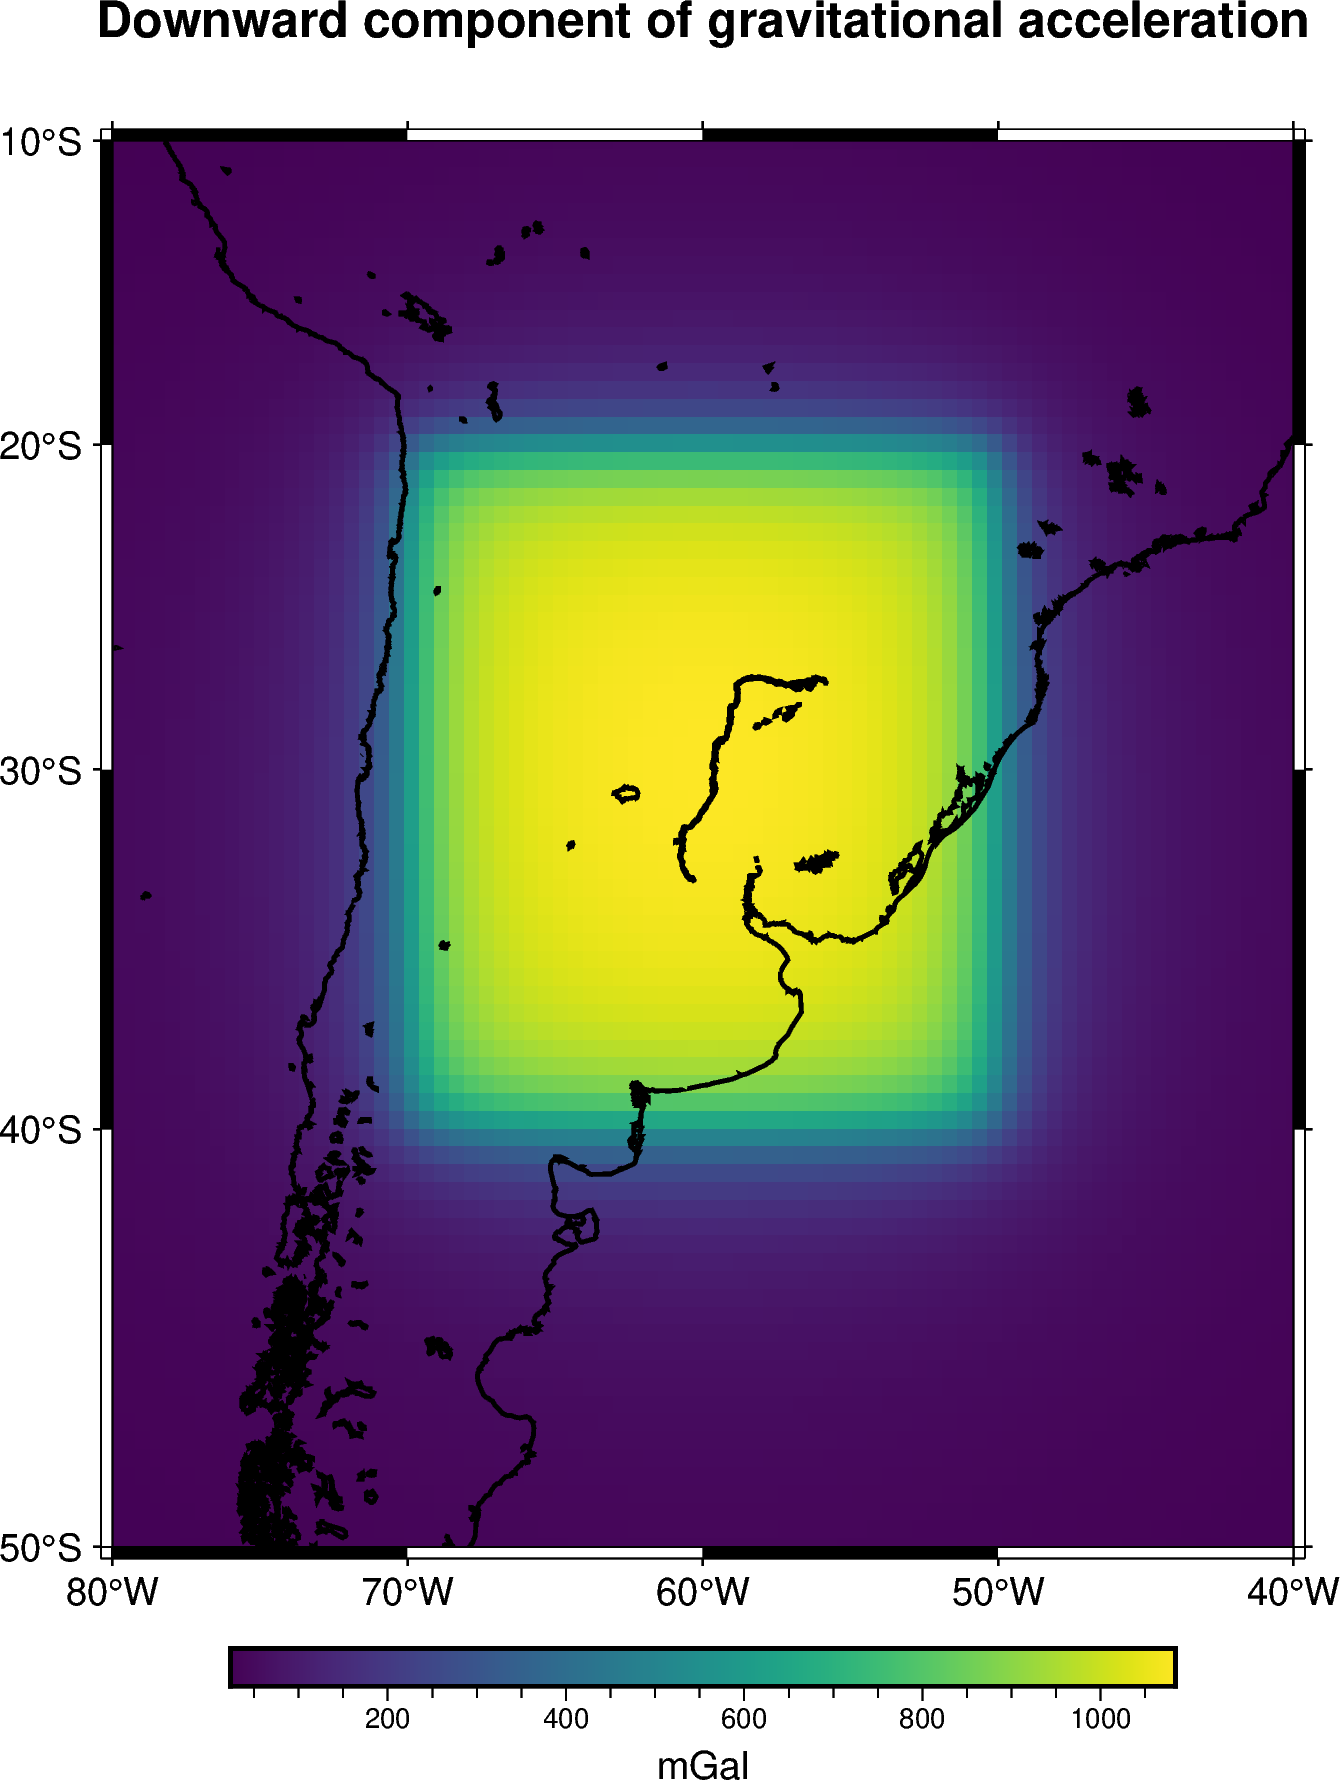

In [6]:
import pygmt
grid = vd.make_xarray_grid(
   coordinates, gravity, data_names="gravity", extra_coords_names="extra")

fig = pygmt.Figure()
title = "Downward component of gravitational acceleration"
with pygmt.config(FONT_TITLE="12p"):
   fig.grdimage(
      region=[-80, -40, -50, -10],
      projection="M-60/-30/10c",
      grid=grid.gravity,
      frame=["a", f"+t{title}"],
      cmap="viridis",
   )

fig.colorbar(cmap=True, frame=["a200f50", "x+lmGal"])
fig.coast(shorelines="1p,black")

fig.show()

In [7]:
tesseroids = [
    [-70, -65, -40, -35, mean_radius - 100e3, mean_radius],
    [-55, -50, -40, -35, mean_radius - 100e3, mean_radius],
    [-70, -65, -25, -20, mean_radius - 100e3, mean_radius],
    [-55, -50, -25, -20, mean_radius - 100e3, mean_radius],
]
densities = [2670 , 2670, 2670, 2670]

In [8]:
coordinates = vd.grid_coordinates(
    region=[-80, -40, -50, -10],
    shape=(80, 80),
    extra_coords=100e3 + mean_radius,
)
gravity = hm.tesseroid_gravity(coordinates, tesseroids, densities, field="g_z")

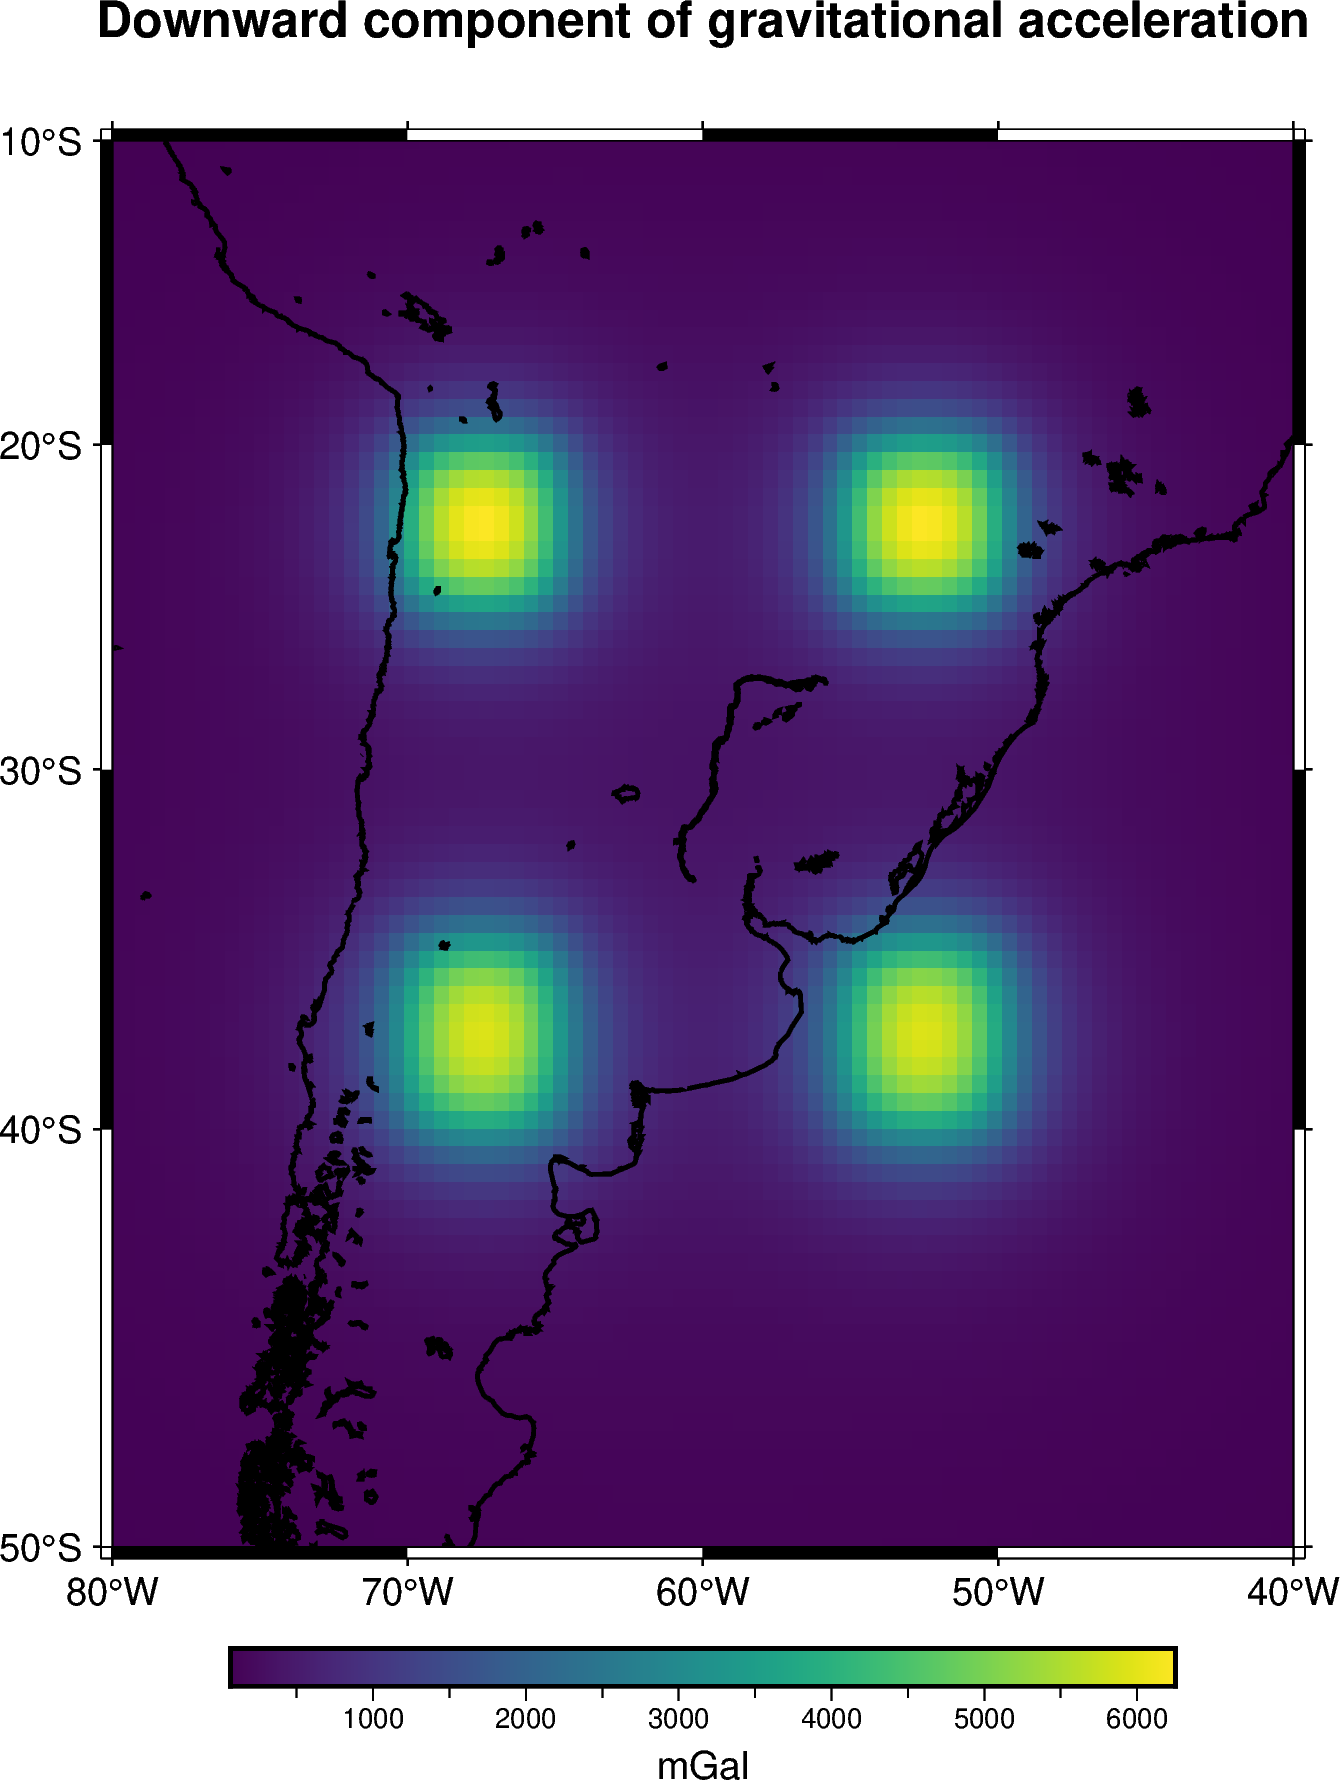

In [9]:
grid = vd.make_xarray_grid(
   coordinates, gravity, data_names="gravity", extra_coords_names="extra")

fig = pygmt.Figure()
title = "Downward component of gravitational acceleration"
with pygmt.config(FONT_TITLE="12p"):
   fig.grdimage(
      region=[-80, -40, -50, -10],
      projection="M-60/-30/10c",
      grid=grid.gravity,
      frame=["a", f"+t{title}"],
      cmap="viridis",
   )

fig.colorbar(cmap=True, frame=["a1000f500", "x+lmGal"])
fig.coast(shorelines="1p,black")

fig.show()

In [10]:
tesseroids = (
    [-70, -60, -40, -30, mean_radius - 3e3, mean_radius],
    [-70, -60, -30, -20, mean_radius - 5e3, mean_radius],
    [-60, -50, -40, -30, mean_radius - 7e3, mean_radius],
    [-60, -50, -30, -20, mean_radius - 10e3, mean_radius],
)

In [11]:
from numba import njit

@njit
def density(radius):
    """Linear density function"""
    top = mean_radius
    bottom = mean_radius - 10e3
    density_top = 2670
    density_bottom = 3000
    slope = (density_top - density_bottom) / (top - bottom)
    return slope * (radius - bottom) + density_bottom

In [12]:
coordinates = vd.grid_coordinates(
    region=[-80, -40, -50, -10],
    shape=(80, 80),
    extra_coords=100e3 + ellipsoid.mean_radius,
)

In [13]:
gravity = hm.tesseroid_gravity(coordinates, tesseroids, density, field="g_z")

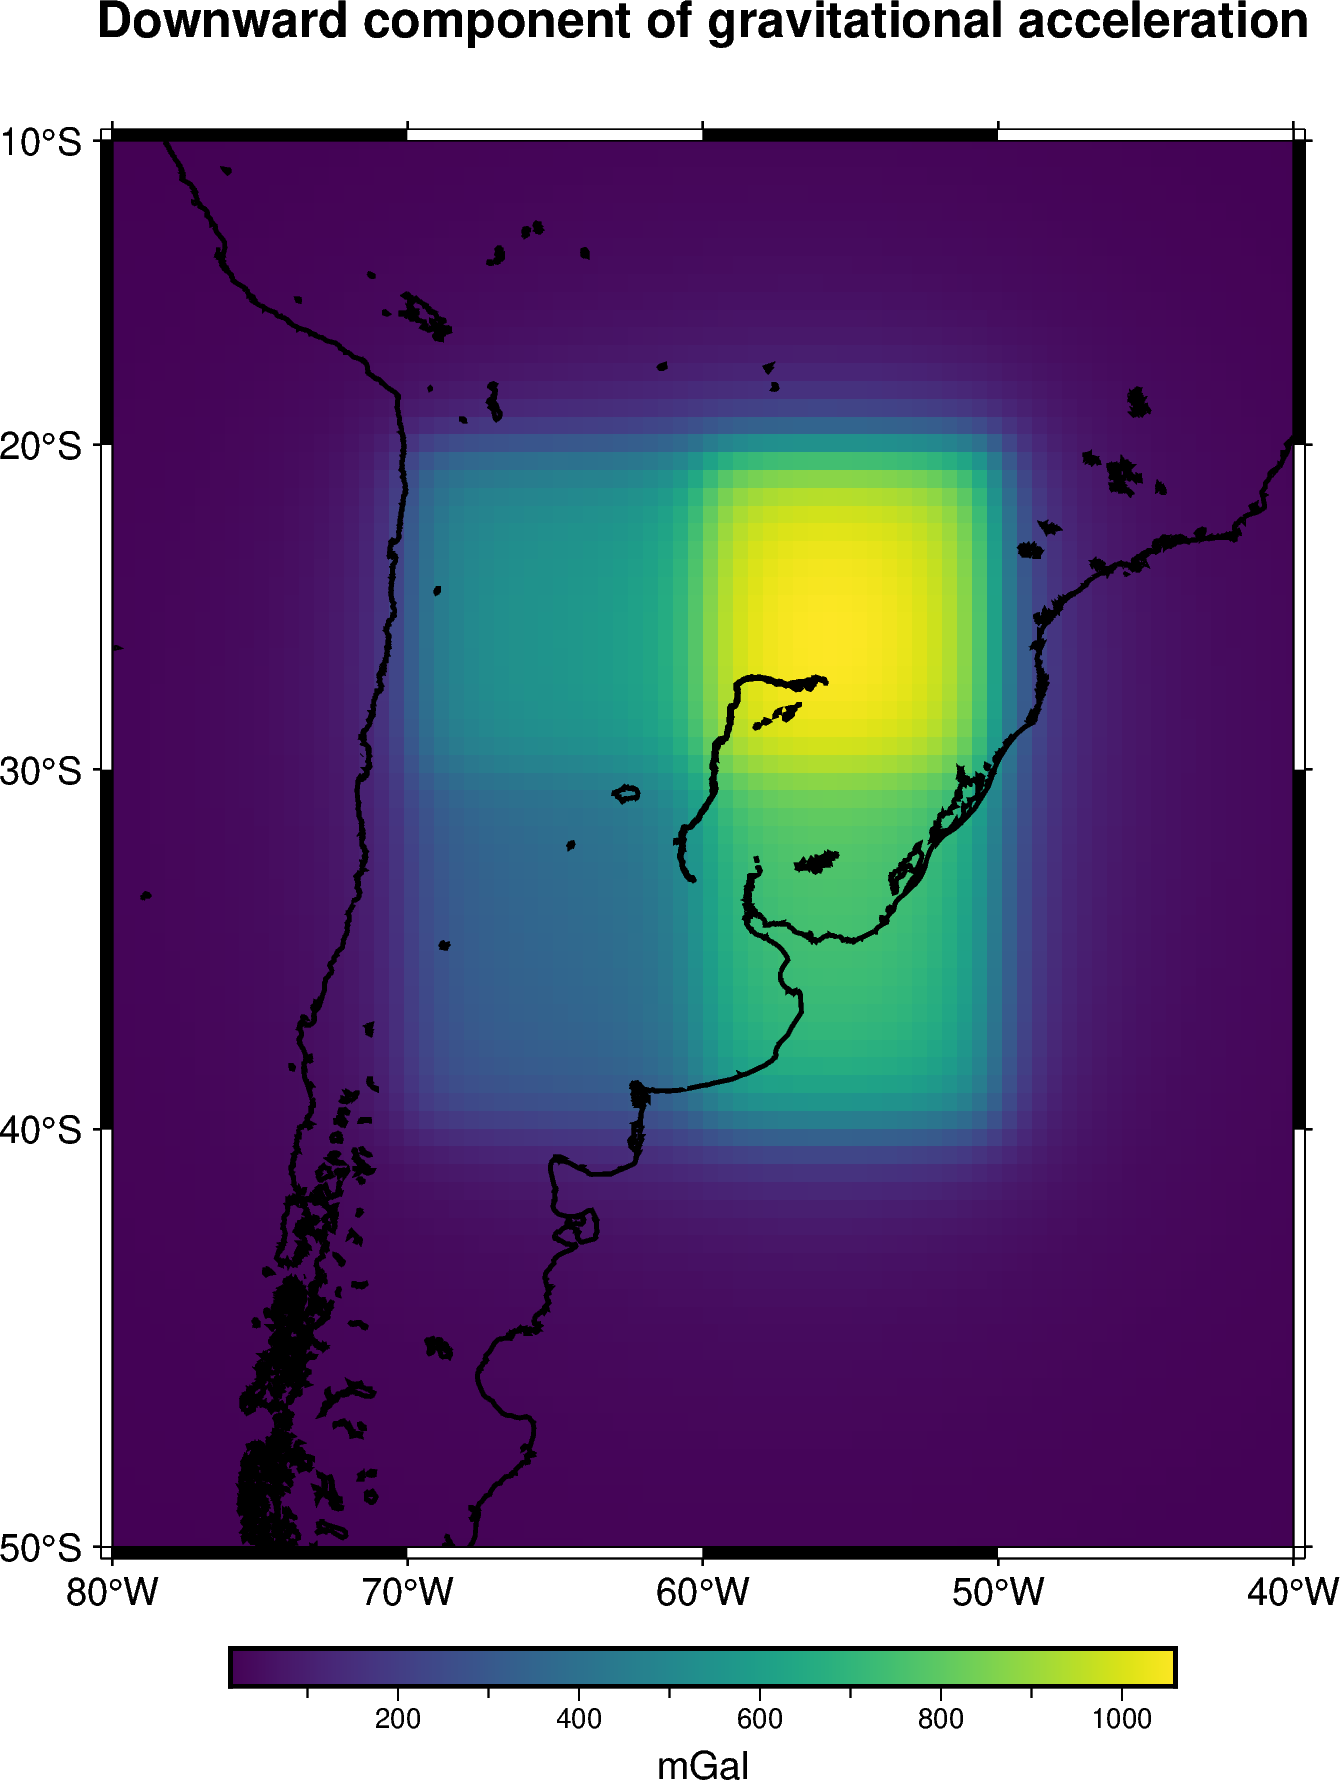

In [14]:
grid = vd.make_xarray_grid(
   coordinates, gravity, data_names="gravity", extra_coords_names="extra")

fig = pygmt.Figure()
title = "Downward component of gravitational acceleration"
with pygmt.config(FONT_TITLE="12p"):
   fig.grdimage(
      region=[-80, -40, -50, -10],
      projection="M-60/-30/10c",
      grid=grid.gravity,
      frame=["a", f"+t{title}"],
      cmap="viridis",
   )

fig.colorbar(cmap=True, frame=["a200f100", "x+lmGal"])
fig.coast(shorelines="1p,black")

fig.show()